#                                 Statistics Mini Project

# Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind,ttest_1samp,ttest_rel
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency,chisquare
from scipy.stats import f_oneway
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway

1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

In [424]:
fifa=pd.read_csv('fifa_stats.csv')
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [427]:
df=fifa[['Name','Age','Overall_rating','Potential','Preferred Foot','Skill Moves']]
df

,Name,Age,Overall_rating,Potential,Preferred Foot,Skill Moves
0,L. Messi,31,94,94,Left,4
1,Cristiano Ronaldo,33,94,94,Right,5
2,Neymar Jr,26,92,93,Right,5
3,De Gea,27,91,93,Right,1
4,K. De Bruyne,27,91,92,Right,4
...,...,...,...,...,...,...
1995,R. BorrÃ©,22,75,82,Right,4
1996,E. ZukanoviÄ‡,31,75,75,Left,2
1997,A. Elis,22,75,82,Right,4
1998,M. FernÃ¡ndez,32,75,75,Right,5


In [30]:
df.isnull().sum()

Name              0
Age               0
Overall_rating    0
Potential         0
Preferred Foot    0
Skill Moves       0
dtype: int64

# a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [131]:
df1=df['Age']
df1

0       31
1       33
2       26
3       27
4       27
        ..
1995    22
1996    31
1997    22
1998    32
1999    28
Name: Age, Length: 2000, dtype: int64

In [132]:
np.mean(df1),np.std(df1,ddof=1)#POPULATION MEAN AND POPULATION STD

(27.2315, 3.8590612753574423)

In [134]:
shapiro(df1)

ShapiroResult(statistic=0.9883174300193787, pvalue=1.1409696104580647e-11)

In [187]:
samp=[]# From the total population pull only 200 random samples from the fifa.csv
for i in np.arange(200):
    samp.append(random.choice(df1))

In [137]:
len(samp)

200

In [138]:
shapiro(samp)#To check the normality for the age variable 
#Since the pvalue(0.006) is less than 0.05,it proves that this is not normally distributed

ShapiroResult(statistic=0.9811950325965881, pvalue=0.00881111528724432)

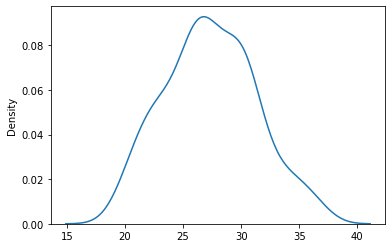

In [188]:
sns.kdeplot(samp)
plt.show()#for inference 

In [189]:
pd.DataFrame(samp).skew()#It is right skewness but negligible

0    0.158935
dtype: float64

In [163]:
np.mean(samp),np.std(samp,ddof=1)# the mean and std of the 200 samples

(27.4, 3.8475992645417887)

In [164]:
SE=3.8475992645417887/np.sqrt(200)#Standard error of the 200samples
SE

0.27206635312458716

In [165]:
[27.065-1.96*0.27206635312458716,27.065+1.96*0.27206635312458716]#Calculate for 95% CI range

[26.53174994787581, 27.598250052124193]

The sample mean is 27 and the sample Standard deviation of the age is 3.84.Based on the given 200 sample,the population mean lies between 26 to 27.Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, the sample means cluster more and more around the true population mean.

# b)Is there any evidence that the players overall rating is greater than 80?

In [166]:
df2=df['Overall_rating']
df2

0       94
1       94
2       92
3       91
4       91
        ..
1995    75
1996    75
1997    75
1998    75
1999    75
Name: Overall_rating, Length: 2000, dtype: int64

In [167]:
shapiro(df2)

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)

In [168]:
np.mean(df2),np.std(df2,ddof=1)

(78.197, 3.2859686235411525)

The null and alternative hypothesis is:
H0:<= than 80
Ha:> 80

In [175]:
samp1=[]# From the total population pull only 200 random samples from the fifa.csv
for i in np.arange(200):
    samp1.append(random.choice(df2))

In [176]:
len(samp1)

200

In [177]:
shapiro(samp1)#To check the normality for the age variable 
#Since the pvalue(10 power 12) is less than 0.05,it proves that this is not normally distributed

ShapiroResult(statistic=0.862538754940033, pvalue=1.821722894063127e-12)

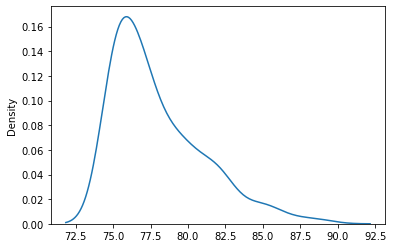

In [190]:
sns.kdeplot(samp1)
plt.show()

In [179]:
pd.DataFrame(samp1).skew()#RIGHT SKEWED

0    1.191671
dtype: float64

In [192]:
np.mean(samp1),np.std(samp1,ddof=1)# the mean and std of the 200 samples

(77.98, 3.0357335838244763)

In [193]:
SE=3.0357335838244763/np.sqrt(200)#Standard error of the 200samples
SE

0.21465878029980276

In [194]:
[77.98-1.96*0.21465878029980276,77.98+1.96*0.21465878029980276]#Calculate for 95% CI range

[77.55926879061239, 78.40073120938762]

Baseed on the given sample ,the population mean of the overall_rating lies between the range 77 to 78.Hence, it accept the null hypothesis as the players overall rating is not greater than 80.

# c)Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

The null and alternative hypothesis is:
H0: preferred foot has impact on potential
Ha: preferred foot has not impact on potential

In [202]:
G1 = df['Potential'][df['Preferred Foot']=='Left']
G2 = df['Potential'][df['Preferred Foot']=='Right']

In [203]:
stats.ttest_ind(G1,G2)

Ttest_indResult(statistic=1.5378037422592814, pvalue=0.12425494914461453)

In [ ]:
we cannot reject null hypothesis as the pvalue is more than 0.05.Hence we prove that the prefreed foot is depends on potential

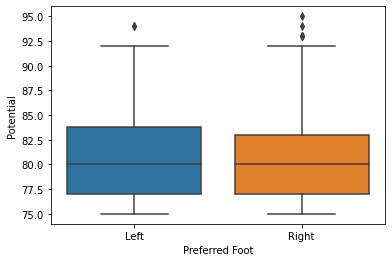

In [211]:
sns.boxplot(df['Preferred Foot'],df['Potential'])
plt.show()

# d)Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

The null and alternative hypothesis is:
H0: Have relation between the overall rating and potential
Ha: Have no relation between the overall rating and potential

In [429]:
df3=(df['Overall_rating'],df['Potential'])

In [215]:
shapiro(df3)

ShapiroResult(statistic=0.8974759578704834, pvalue=1.401298464324817e-45)

We reject null hypothesis as the pvalue[1 to the power of 45] is very less than 0.05.Hence,alterative hypothesis holds good, we prove that there is no relation between the overall rating and potential

# e)Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

The null and alternative hypothesis is:
H0: skill move have effect in overall rating
Ha: skill move have not effect in overall rating

In [219]:
G1 = df['Potential'][df['Skill Moves']==1]
G2 = df['Potential'][df['Skill Moves']==2]
G3 = df['Potential'][df['Skill Moves']==3]
G4 = df['Potential'][df['Skill Moves']==4]
G5 = df['Potential'][df['Skill Moves']==5]

In [223]:
from scipy import stats
stats.kruskal(G1,G2,G3,G4,G5)

KruskalResult(statistic=82.66550786888745, pvalue=4.7433980049988346e-17)

We reject null hypothesis as the pvalue[4 to the power of 17] is very less than 0.05.Hence,alterative hypothesis holds good, we prove that skill move have not effect in overall rating

# 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 

In [4]:
m=pd.read_csv('phone.csv')
m

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


In [225]:
m.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [232]:
m.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


# a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

In [226]:
dur_calls=m['duration']
dur_calls

0      221.321120
1       81.610599
2      143.109111
3      111.888670
4      246.695171
          ...    
815    185.328156
816     89.819383
817    117.604998
818     77.834006
819    146.000584
Name: duration, Length: 820, dtype: float64

In [241]:
samp=[]# From the total population pull only 200 random samples from the fifa.csv
for i in np.arange(200):
    samp.append(random.choice(dur_calls))

In [229]:
len(samp)

200

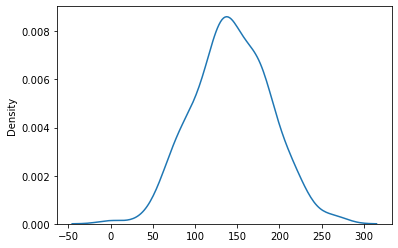

In [242]:
sns.kdeplot(samp)
plt.show()

In [243]:
pd.DataFrame(samp).skew()#Left skewed

0    0.007191
dtype: float64

In [244]:
np.mean(samp),np.std(samp,ddof=1)# the mean and std of the 200 samples

(143.42408482355, 44.75874278368288)

In [245]:
se=44.75874278368288/np.sqrt(200)#Standard error of the 200samples
se

3.164921053972661

In [246]:
[143.42408482355-1.96*3.164921053972661,143.42408482355+1.96*3.164921053972661]#Calculate for 95% CI range

[137.22083955776358, 149.62733008933643]

The range estimate of average duration calls made by the entire network lies between 137 to 149 with 95% confidence interval.

# 99% confidence interval

In [247]:
[143.42408482355-2.58*3.164921053972661,143.42408482355+2.58*3.164921053972661]

[135.25858850430055, 151.58958114279946]

In [ ]:
The range estimate of average duration calls made by the entire network lies between 135 to 151 with 99% confidence interval.

# b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

Ho: Observed = Expected (Networks are equally distributed)
Ha : Observed ≠ Expected (Networks are not equally distributed)

Ho: Observed = Expected (Networks are equally distributed)
Ha : Observed ≠ Expected (Networks are not equally distributed)

In [20]:
sd=m['network']
sd.value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [39]:
820/7

117.14285714285714

In [40]:
chisquare([215,215,150,87,84,42,27],[117.14285714285714,117.14285714285714,117.14285714285714,117.14285714285714,117.14285714285714,117.14285714285714,117.14285714285714])

Power_divergenceResult(statistic=307.409756097561, pvalue=2.112592760257685e-63)

The corresponding p_value is 0.000002(2 to the power of 63).
Hence we reject null hypothesis.
Networks are not equally distributed.

# c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

In [421]:
g=m[['network','duration']]

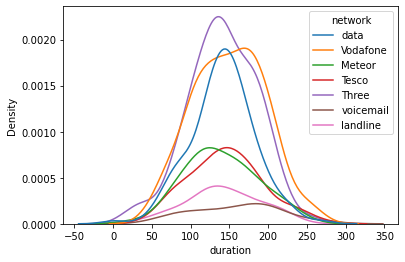

In [397]:
sns.kdeplot(g['duration'],hue=g['network'])
plt.show()

# d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required

The null and alternative hypothesis is:
H0: m1=m2=m3#relation
Ha: NOT EQUAL#no relation

In [346]:
rel=m[['duration','item']]
rel

,duration,item
0,221.321120,data
1,81.610599,call
2,143.109111,call
3,111.888670,call
4,246.695171,call
...,...,...
815,185.328156,data
816,89.819383,data
817,117.604998,data
818,77.834006,sms


In [347]:
m1 = m['duration'][m['item']=='data']
m2 = m['duration'][m['item']=='call']
m3= m['duration'][m['item']=='sms']

In [350]:
f_oneway(m1,m2,m3)

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

The corresponding pvalue is 0.14.
since the pvalue is not less than 0.05,we reject the null hypothesis.
This means we dont have the relation between item and duration.

# e)	Perform statistical tests to identify the relation between network and network_type. 

Ho: Observed = Expected (Network and Network_type are not related)
Ha : Observed ≠ Expected (Network and Network_type are related)

In [400]:
net=m[['network','network_type']]

In [411]:
ct=pd.crosstab(net['network'],net['network_type'])
ct

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [413]:
[chi,p_value,df,ec]=chi2_contingency(ct)
print(chi)
print(p_value)
print(ec)

2460.0
0.0
[[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]


The corresponding p_value is 0.0.
Hence we accept null hypothesis.
Network and Network_type are not related